# Credit Card Data Mining, Visualization and Transaction Classification

This codes are for improve accuracy and other performance metrics for the same data


In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [2]:
from os import listdir
from os.path import isfile, join
listdir('C:/Users/Arif/NLP/datasets_creditcard_2009')

['DataminingContest2009.Task1.CV1.Test.Inputs',
 'DataminingContest2009.Task1.CV1.Test.Targets',
 'DataminingContest2009.Task1.CV1.Train.Inputs',
 'DataminingContest2009.Task1.CV1.Train.Targets',
 'DataminingContest2009.Task1.CV10.Test.Inputs',
 'DataminingContest2009.Task1.CV10.Test.Targets',
 'DataminingContest2009.Task1.CV10.Train.Inputs',
 'DataminingContest2009.Task1.CV10.Train.Targets',
 'DataminingContest2009.Task1.CV2.Test.Inputs',
 'DataminingContest2009.Task1.CV2.Test.Targets',
 'DataminingContest2009.Task1.CV2.Train.Inputs',
 'DataminingContest2009.Task1.CV2.Train.Targets',
 'DataminingContest2009.Task1.CV3.Test.Inputs',
 'DataminingContest2009.Task1.CV3.Test.Targets',
 'DataminingContest2009.Task1.CV3.Train.Inputs',
 'DataminingContest2009.Task1.CV3.Train.Targets',
 'DataminingContest2009.Task1.CV4.Test.Inputs',
 'DataminingContest2009.Task1.CV4.Test.Targets',
 'DataminingContest2009.Task1.CV4.Train.Inputs',
 'DataminingContest2009.Task1.CV4.Train.Targets',
 'DataminingCont

## Data Reading From the files and combine in Pandas DataFrame

In [3]:
traindata = []
testdata = []
file='C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV'
for i in range(1,11): # for two files
    file_name1 = file + str(i) + '.Train.Inputs'
    file_name2 = file + str(i) + '.Test.Inputs'
    print ("Reading File :", file_name1)
    with open(file_name1) as f1:
        next(f1)
        for line1 in f1:
            traindata.append(line1.strip())
    print ("Reading File :", file_name2)
    with open(file_name2) as f2:
        next(f2)
        for line2 in f2:
            testdata.append(line2.strip())

Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Test.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV5.Train.Inputs
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest20

In [4]:
traintarget = []
testtarget = []
file='C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV'
for i in range(1,11): # for two files
    file_name3 = file + str(i) + '.Train.Targets'
    file_name4 = file + str(i) + '.Test.Targets'
    print ("Reading File :", file_name3)
    with open(file_name3) as f3:
        for line3 in f3:
            traintarget.append(line3.strip())
    print ("Reading File :", file_name4)
    with open(file_name4) as f4:
        for line4 in f4:
            testtarget.append(line4.strip())

Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV1.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV2.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV3.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV4.Test.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/DataminingContest2009.Task1.CV5.Train.Targets
Reading File : C:/Users/Arif/NLP/datasets_creditcard_2009/Datamining

In [5]:
len(traindata), traindata[0:1]

(852138, ['12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1'])

In [6]:
traindata[-1]

'38.85,19,AZ,857,2,AOL.COM,0,19,0,38.85,-676,8,2,0,0,1,1,0,4'

In [7]:
train_data=pd.DataFrame(sub.split(",") for sub in traindata)
test_data=pd.DataFrame(sub.split(",") for sub in testdata)

In [8]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.9,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [9]:
train_target=pd.DataFrame(traintarget)
test_target=pd.DataFrame(testtarget)

In [10]:
train_data.columns = ['amount','hour1','state1','zip1','field1','domain1','field2','hour2','flag1','total','field3','field4','field5','indicator1','indicator2','flag2','flag3','flag4','flag5']
test_data.columns = ['amount','hour1','state1','zip1','field1','domain1','field2','hour2','flag1','total','field3','field4','field5','indicator1','indicator2','flag2','flag3','flag4','flag5']

In [11]:
train_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.9,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [12]:
len(train_data), len(test_data)

(852138, 94682)

In [13]:
train_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
train_target.columns = ['label']
test_target.columns = ['label']

In [15]:
len(train_data), len(test_data), len(train_target), len(test_target)

(852138, 94682, 852138, 94682)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852138 entries, 0 to 852137
Data columns (total 19 columns):
amount        852138 non-null object
hour1         852138 non-null object
state1        852138 non-null object
zip1          852138 non-null object
field1        852138 non-null object
domain1       852138 non-null object
field2        852138 non-null object
hour2         852138 non-null object
flag1         852138 non-null object
total         852138 non-null object
field3        852138 non-null object
field4        852138 non-null object
field5        852138 non-null object
indicator1    852138 non-null object
indicator2    852138 non-null object
flag2         852138 non-null object
flag3         852138 non-null object
flag4         852138 non-null object
flag5         852138 non-null object
dtypes: object(19)
memory usage: 123.5+ MB


In [17]:
#train_data = train_data.apply(pd.to_numeric)
train_data["amount"] = train_data["amount"].apply(pd.to_numeric)

In [18]:
train_data['amount'].groupby(train_data['state1']).describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
state1,,,,,,,,
CA,168084.0,26.189845,14.171889,0.00,12.95,25.90,38.85,95.40
FL,75924.0,25.292438,14.016518,0.00,12.95,20.72,38.85,95.40
TX,59580.0,25.964218,14.204004,0.00,12.95,25.90,38.85,95.40
NY,52155.0,26.317745,14.258108,0.00,12.95,25.90,38.85,95.40
GA,40311.0,24.895905,13.814350,0.00,12.95,20.72,38.85,95.40
VA,33327.0,25.884753,13.950680,0.00,12.95,25.90,38.85,59.95
IL,32436.0,26.519537,14.223892,0.00,12.95,25.90,38.85,59.95
AZ,29124.0,25.315538,14.132301,0.00,12.95,20.72,38.85,95.40
MD,24039.0,25.904878,13.897899,0.00,12.95,25.90,38.85,59.95


In [19]:
train_data['amount'].groupby(train_data['state1']).sum()

state1
AE    3.496500e+02
AK    8.418753e+04
AL    2.001970e+05
AP    7.459200e+02
AR    1.262281e+05
AZ    7.372897e+05
CA    4.402094e+06
CO    3.865546e+05
CT    2.611847e+05
DC    1.259008e+05
DE    7.028640e+04
FL    1.920303e+06
GA    1.003579e+06
HI    8.848008e+04
IA    8.447634e+04
ID    7.250319e+04
IL    8.601877e+05
IN    2.516517e+05
KS    1.192352e+05
KY    1.311128e+05
LA    2.243315e+05
MA    3.750837e+05
MD    6.227274e+05
ME    4.915755e+04
MI    4.077002e+05
MN    2.699148e+05
MO    2.801804e+05
MS    9.060912e+04
MT    3.459645e+04
NC    5.201277e+05
ND    1.914993e+04
NE    6.988338e+04
NH    7.582338e+04
NJ    6.483458e+05
NM    7.237953e+04
NV    3.570496e+05
NY    1.372602e+06
OH    5.250875e+05
OK    1.678149e+05
OR    2.256515e+05
PA    5.743893e+05
RI    5.193495e+04
SC    2.458301e+05
SD    1.969200e+04
TN    2.730849e+05
TX    1.546948e+06
UT    1.414845e+05
VA    8.626612e+05
VT    2.442888e+04
WA    5.248805e+05
WI    1.773257e+05
WV    4.988682e+04
WY   

In [20]:
total_transact=train_data['amount'].groupby(train_data['state1']).sum().reset_index().sort_values('amount', ascending=False)
total_transact.head()

,state1,amount
6,CA,4.402094e+06
11,FL,1.920303e+06
45,TX,1.546948e+06
36,NY,1.372602e+06
12,GA,1.003579e+06


In [21]:
aggregations = {
   # 'amount':[count,sum],
    'amount': lambda x: sum(x)
}
train_data.groupby('state1',as_index=False).agg(aggregations).sort_values('amount', ascending=False).head()

,state1,amount
6,CA,4.402094e+06
11,FL,1.920303e+06
45,TX,1.546948e+06
36,NY,1.372602e+06
12,GA,1.003579e+06


In [26]:
#import chart_studio.plotly as py
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
#plotly.tools.set_credentials_file(username='mhaqu001', api_key='Your API KEY HERE')
# register a free account at plotly and then put your username and api_key here

data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = total_transact['state1'],
        z = total_transact['amount'].astype(float),
        locationmode = 'USA-states',
        text = total_transact['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='transaction-map' )
#fig.update_layout(title_text='Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)', title_x=2.0)

#title = {
#            'text' : 'Total amout of transactions (Using Traning Data) <br>(Hover for breakdown)',
#            'x':0.5,
#            'xanchor': 'center'
#        }

In [33]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = train_data['amount'].groupby(train_data['state1']).count().reset_index()['state1'],
        z = train_data['amount'].groupby(train_data['state1']).count().reset_index()['amount'].astype(float),
        locationmode = 'USA-states',
        text = train_data['amount'].groupby(train_data['state1']).count().reset_index()['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No. of transaction")
        ) ]

layout = dict(
        title = 'Number of transactions (Using Training Data) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='number_of_transaction-map' )

## Train and test data

In [22]:
X_train, X_test, y_train, y_test =train_data, test_data, train_target, test_target

In [23]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [24]:
X_train.describe()

,amount
count,852138.000000
mean,25.635312
std,14.190418
min,0.000000
25%,12.950000
50%,25.900000
75%,38.850000
max,95.400000


In [25]:
y_train.label.count()

852138

In [26]:
y_train.label.value_counts()

0    833292
1     18846
Name: label, dtype: int64

In [27]:
#Data Imbalance Calculation
Fraud_Fraction=round(float(y_train[y_train.label=='1'].count()/y_train.label.count()),4)
Non_Fraud_Fraction =round(float(y_train[y_train.label=='0'].count()/y_train.label.count()),4)
print ("Fraud Fraction :", Fraud_Fraction)
print ("Non Fraud Fraction :", Non_Fraud_Fraction)

Fraud Fraction : 0.0221
Non Fraud Fraction : 0.9779


<AxesSubplot:>

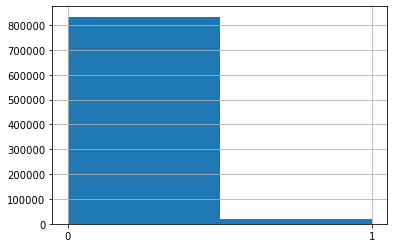

In [28]:
#Histogram 
y_train.label.hist(bins=2)

## Data Aggregations By State

In [30]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.9,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [31]:
X_train.dtypes

amount        float64
hour1          object
state1         object
zip1           object
field1         object
domain1        object
field2         object
hour2          object
flag1          object
total          object
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
dtype: object

In [32]:
X_train = X_train.astype({"amount": float, "hour1": int})

In [33]:
X_train = X_train.astype({"state1": str, "zip1": str, 'field1': int, "domain1": str,'field2': int, "hour2": int, 'total': float})

In [34]:
X_train.dtypes

amount        float64
hour1           int32
state1         object
zip1           object
field1          int32
domain1        object
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
dtype: object

In [35]:
data_train=pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test, y_test], axis=1)

In [36]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [37]:
# Merge data & label for preprocessing
#data_train = X_train.join(pd.get_dummies(y_train))
#data_test = X_test.join(pd.get_dummies(y_test))
print('Original data train length: ', len(data_train))
print('Original data test length: ', len(data_test))

Original data train length:  852138
Original data test length:  94682


In [38]:
# drop rows with NaN values
data_train = data_train.dropna().copy()
data_test = data_test.dropna().copy()

print('Data train length without NaN: ', len(data_train))
print('Data test length without NaN: ', len(data_test))

Data train length without NaN:  852138
Data test length without NaN:  94682


In [39]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [40]:
data_train.dtypes

amount        float64
hour1           int32
state1         object
zip1           object
field1          int32
domain1        object
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
label          object
dtype: object

In [41]:
data_train = data_train.astype({"label": int})
data_test = data_test.astype({"label": int})

In [42]:
fraud_by_state=data_train['label'].groupby(data_train['state1']).sum().reset_index().sort_values('label', ascending=False)
fraud_by_state

,state1,label
6,CA,4257
11,FL,1881
5,AZ,1602
45,TX,1116
47,VA,972
25,MN,720
44,TN,666
36,NY,657
12,GA,603
20,LA,603


In [43]:
aggregations = {
    'amount':'count',
    'label': 'sum'
#     'class' : lambda x: sum(x)
  }
fraud_by_state_devided_by_transactions=data_train.groupby('state1',as_index=False).agg(aggregations)
fraud_by_state_devided_by_transactions['fraud_per_totnum']=fraud_by_state_devided_by_transactions['label']/fraud_by_state_devided_by_transactions['amount']*100
fraud_by_state_devided_by_transactions.sort_values('fraud_per_totnum',ascending=False).head()

,state1,amount,label,fraud_per_totnum
25,MN,11502,720,6.259781
20,LA,10476,603,5.756014
5,AZ,29124,1602,5.500618
44,TN,12474,666,5.339105
41,RI,2007,72,3.587444


In [48]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = fraud_by_state_devided_by_transactions['state1'],
        z = fraud_by_state_devided_by_transactions['fraud_per_totnum'],
        locationmode = 'USA-states',
        text = fraud_by_state_devided_by_transactions['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of fraud Transactions per <br>total number of transactions")
        ) ]

layout = dict(
        title = 'Total Number of fradulant transactions per <br>total number of transactions in each state <br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='No_of_fraud_transaction_per_transaction-map' )

In [44]:
# Label Encoding non-numerical feature
le = LabelEncoder()
data_train['state1'] = le.fit_transform(data_train['state1'])
data_train['domain1'] = le.fit_transform(data_train['domain1'])

data_test['state1'] = le.fit_transform(data_test['state1'])
data_test['domain1'] = le.fit_transform(data_test['domain1'])
 
display(data_train.head())

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [45]:
data_train.dtypes

amount        float64
hour1           int32
state1          int32
zip1           object
field1          int32
domain1         int32
field2          int32
hour2           int32
flag1          object
total         float64
field3         object
field4         object
field5         object
indicator1     object
indicator2     object
flag2          object
flag3          object
flag4          object
flag5          object
label           int32
dtype: object

In [53]:
#data_train.convert_dtypes().dtypes
#data_test.convert_dtypes().dtypes

In [46]:
data_train = data_train.astype({"flag1": int, 'field3': int, 'field4': int, 'field5': int, "indicator1": int,'indicator2': int, "flag2": int,"flag3": int, "flag4": int, "flag5": int})
data_test = data_test.astype({"flag1": int, 'field3': int, 'field4': int, 'field5': int, "indicator1": int,'indicator2': int, "flag2": int,"flag3": int, "flag4": int, "flag5": int})

In [52]:
# data_train correlation
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,amount,hour1,state1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1,0.015,0.00042,-0.081,-0.0017,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.079,-0.024
hour1,0.015,1,-0.014,-0.0019,-0.011,0.01,0.99,-0.041,0.015,0.0084,0.012,-0.011,0.00056,-0.0085,-0.015,-0.013,-0.013,-0.017,-0.16
state1,0.00042,-0.014,1,-0.015,0.014,0.0049,-0.014,-0.026,0.00047,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
field1,-0.081,-0.0019,-0.015,1,0.013,0.041,-0.0019,-0.025,-0.082,0.088,-0.0089,0.025,0.033,0.0015,0.014,0.046,0.041,0.071,0.092
domain1,-0.0017,-0.011,0.014,0.013,1,-0.0077,-0.011,-0.018,-0.0013,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
field2,0.01,0.01,0.0049,0.041,-0.0077,1,0.0095,-0.088,0.01,0.027,0.074,-0.024,0.011,0.003,0.013,-0.0035,-0.022,0.01,-0.0041
hour2,0.015,0.99,-0.014,-0.0019,-0.011,0.0095,1,-0.042,0.015,0.0078,0.012,-0.012,0.00078,-0.0079,-0.015,-0.012,-0.013,-0.017,-0.16
flag1,-0.21,-0.041,-0.026,-0.025,-0.018,-0.088,-0.042,1,-0.21,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
total,1,0.015,0.00047,-0.082,-0.0013,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.082,-0.024
field3,-0.078,0.0084,0.034,0.088,0.11,0.027,0.0078,0.052,-0.078,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066


In [83]:
data_train.dtypes

amount        float64
hour1           int32
state1          int32
zip1           object
field1          int32
domain1         int32
field2          int32
hour2           int32
flag1           int32
total         float64
field3          int32
field4          int32
field5          int32
indicator1      int32
indicator2      int32
flag2           int32
flag3           int32
flag4           int32
flag5           int32
label           int32
dtype: object

In [80]:
data_train.to_csv(r'Complete_Train_Data.csv', index = False)

In [81]:
data_test.to_csv(r'Complete_Test_Data.csv', index = False)

In [82]:
# data_train correlation
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,amount,hour1,state1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1,0.015,0.00042,-0.081,-0.0017,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.079,-0.024
hour1,0.015,1,-0.014,-0.0019,-0.011,0.01,0.99,-0.041,0.015,0.0084,0.012,-0.011,0.00056,-0.0085,-0.015,-0.013,-0.013,-0.017,-0.16
state1,0.00042,-0.014,1,-0.015,0.014,0.0049,-0.014,-0.026,0.00047,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
field1,-0.081,-0.0019,-0.015,1,0.013,0.041,-0.0019,-0.025,-0.082,0.088,-0.0089,0.025,0.033,0.0015,0.014,0.046,0.041,0.071,0.092
domain1,-0.0017,-0.011,0.014,0.013,1,-0.0077,-0.011,-0.018,-0.0013,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
field2,0.01,0.01,0.0049,0.041,-0.0077,1,0.0095,-0.088,0.01,0.027,0.074,-0.024,0.011,0.003,0.013,-0.0035,-0.022,0.01,-0.0041
hour2,0.015,0.99,-0.014,-0.0019,-0.011,0.0095,1,-0.042,0.015,0.0078,0.012,-0.012,0.00078,-0.0079,-0.015,-0.012,-0.013,-0.017,-0.16
flag1,-0.21,-0.041,-0.026,-0.025,-0.018,-0.088,-0.042,1,-0.21,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
total,1,0.015,0.00047,-0.082,-0.0013,0.01,0.015,-0.21,1,-0.078,0.069,-0.056,-0.024,-0.014,0.098,0.015,-0.034,-0.082,-0.024
field3,-0.078,0.0084,0.034,0.088,0.11,0.027,0.0078,0.052,-0.078,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066


In [84]:
# data_test correlation
corr = data_test.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,state1,domain1,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
state1,1,0.014,-0.026,0.034,0.019,0.0034,-0.018,0.003,0.0064,-0.00071,-0.002,0.019,-0.017
domain1,0.014,1,-0.018,0.11,0.069,-0.016,0.052,0.012,-0.019,-0.023,-0.02,-0.044,-0.0052
flag1,-0.026,-0.018,1,0.052,-0.46,0.18,0.011,0.029,-0.0033,-0.0057,0.093,-0.029,-0.025
field3,0.034,0.11,0.052,1,0.019,-0.0092,0.13,-0.0062,-0.039,-0.02,-0.028,-0.0098,-0.066
field4,0.019,0.069,-0.46,0.019,1,-0.17,-0.0095,-0.011,0.045,0.039,-0.1,-0.025,-0.057
field5,0.0034,-0.016,0.18,-0.0092,-0.17,1,-0.015,0.0042,0.0033,0.034,0.18,0.0091,0.023
indicator1,-0.018,0.052,0.011,0.13,-0.0095,-0.015,1,-0.048,-0.0019,-0.0014,-0.0056,-0.0029,0.018
indicator2,0.003,0.012,0.029,-0.0062,-0.011,0.0042,-0.048,1,-0.0092,-0.018,-0.006,0.017,0.003
flag2,0.0064,-0.019,-0.0033,-0.039,0.045,0.0033,-0.0019,-0.0092,1,0.46,-0.0068,0.042,0.0078
flag3,-0.00071,-0.023,-0.0057,-0.02,0.039,0.034,-0.0014,-0.018,0.46,1,0.01,0.056,0.079


In [59]:
# Split data & label after preprocessing

y_train = pd.DataFrame()
y_train['label'] = data_train.iloc[:,-1]

y_test = pd.DataFrame()
y_test['label'] = data_test.iloc[:,-1]

X_train = data_train.copy()
X_test = data_test.copy()

In [60]:
X_train.head()


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [61]:
X_test.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,25.9,0,11,331,3,495,1,0,1,25.9,3878,8,0,0,0,0,1,0,1,0
1,38.85,0,45,750,2,1103,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1,0
2,38.85,1,47,222,2,3022,0,1,0,38.85,5183,19,1,0,0,0,0,0,1,0
3,24.95,1,6,946,0,2621,0,1,0,24.95,3822,16,0,0,0,0,0,0,1,0
4,20.72,1,7,805,3,4320,0,1,1,20.72,3536,8,1,0,0,1,1,0,1,0


In [63]:
y_train.head()

,label
0,0
1,0
2,0
3,0
4,0


In [64]:
y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [65]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [66]:
#Save a copy before normalization and undersampling
X_train_original=data_train.iloc[: , :-1]
X_test_original=data_test.iloc[: , :-1]
#y_train_original=y_train
#y_test_original=y_test

In [67]:
X_train_original.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,6,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,6,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,6,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,33,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,6,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [68]:
X_test_original.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,25.9,0,11,331,3,495,1,0,1,25.9,3878,8,0,0,0,0,1,0,1
1,38.85,0,45,750,2,1103,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1
2,38.85,1,47,222,2,3022,0,1,0,38.85,5183,19,1,0,0,0,0,0,1
3,24.95,1,6,946,0,2621,0,1,0,24.95,3822,16,0,0,0,0,0,0,1
4,20.72,1,7,805,3,4320,0,1,1,20.72,3536,8,1,0,0,1,1,0,1


In [69]:
# normalized numerical data
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_data = []
for key in X_train.iteritems() :
    if (len(X_train[key[0]].unique()) > 6) :
        num_data.append(key[0])
        
X_train[num_data] = minmax_scale(X_train[num_data])
X_test[num_data] = minmax_scale(X_test[num_data])
X_train.describe()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
count,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000
mean,0.268714,0.602814,0.436761,0.542872,2.419203,0.412448,0.425561,0.603298,0.546989,0.268618,0.815154,0.199603,0.052911,0.113306,0.018367,0.541127,0.401185,0.019888,0.001884,0.022116
std,0.148747,0.228835,0.297046,0.316321,1.003756,0.338855,0.494428,0.228622,0.497787,0.148833,0.096873,0.162921,0.093228,0.316966,0.134274,0.498306,0.490139,0.139614,0.031415,0.147061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135744,0.434783,0.115385,0.280843,2.000000,0.098073,0.000000,0.478261,0.000000,0.135744,0.759158,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000305,0.000000
50%,0.271488,0.608696,0.384615,0.529589,3.000000,0.308084,0.000000,0.608696,1.000000,0.271488,0.833457,0.150000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000305,0.000000
75%,0.407233,0.782609,0.692308,0.891675,3.000000,0.728820,1.000000,0.782609,1.000000,0.407233,0.886425,0.325000,0.076923,0.000000,0.000000,1.000000,1.000000,0.000000,0.000305,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#normalized X_train
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.135744,0.0,0.115385,0.925777,3,0.028239,1,0.0,1,0.135744,0.691804,0.025,0.000000,1,0,1,1,0,0.000305,0
1,0.115409,0.0,0.115385,0.925777,3,0.028239,1,0.0,1,0.115409,0.691804,0.025,0.000000,1,0,1,1,0,0.000305,0
2,0.407233,0.0,0.115385,0.928786,3,0.308084,1,0.0,0,0.407233,0.861807,0.375,0.038462,0,0,0,0,0,0.000305,0
3,0.271488,0.0,0.634615,0.075226,0,0.028239,1,0.0,0,0.271488,0.899797,0.000,0.000000,0,0,1,1,0,0.000305,0
4,0.135744,0.0,0.115385,0.945838,3,0.932511,0,0.0,1,0.135744,0.892061,0.075,0.038462,0,0,1,0,0,0.000305,0


In [71]:
#normalized X_test
X_test.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.271488,0.000000,0.211538,0.329990,3,0.050464,1,0.000000,1,0.271488,0.893346,0.050,0.000000,0,0,0,1,0,0.000305,0
1,0.407233,0.000000,0.865385,0.750251,2,0.112448,1,0.000000,0,0.407233,0.641035,0.375,0.038462,0,0,1,1,0,0.000305,0
2,0.407233,0.043478,0.903846,0.220662,2,0.308084,0,0.043478,0,0.407233,0.925602,0.325,0.038462,0,0,0,0,0,0.000305,0
3,0.261530,0.043478,0.115385,0.946841,0,0.267204,0,0.043478,0,0.261530,0.891962,0.250,0.000000,0,0,0,0,0,0.000305,0
4,0.217191,0.043478,0.134615,0.805416,3,0.440412,0,0.043478,1,0.217191,0.884893,0.050,0.038462,0,0,1,1,0,0.000305,0


In [72]:
# undersampling train data
from imblearn.under_sampling import NearMiss

nr = NearMiss()
train_data, train_label = nr.fit_sample(X_train, y_train)


In [73]:
train_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.000000,0.478261,0.865385,0.774323,4,0.932511,1,0.478261,1,0.000000,0.973751,0.075,0.346154,0,1,1,1,0,0.000610,0
1,0.000000,0.478261,0.865385,0.774323,4,0.932511,1,0.478261,1,0.000000,0.973751,0.075,0.346154,0,1,1,1,0,0.000610,0
2,0.000000,0.478261,0.115385,0.928786,4,0.705373,0,0.478261,0,0.000000,0.607296,0.400,0.000000,1,0,0,0,0,0.000305,0
3,0.135744,0.000000,0.115385,0.962889,4,0.862473,0,0.000000,0,0.135744,0.811681,0.100,0.000000,1,0,0,1,0,0.000610,0
4,0.135744,0.478261,0.115385,0.900702,4,0.604445,1,0.478261,0,0.135744,0.684537,0.025,0.000000,1,0,0,0,0,0.000305,0


In [74]:
train_label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [75]:
test_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,25.9,0,FL,331,3,BELLSOUTH.NET,1,0,1,25.9,3878,8,0,0,0,0,1,0,1
1,38.85,0,TX,750,2,COMCAST.NET,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1
2,38.85,1,VA,222,2,HOTMAIL.COM,0,1,0,38.85,5183,19,1,0,0,0,0,0,1
3,24.95,1,CA,946,0,GMAIL.COM,0,1,0,24.95,3822,16,0,0,0,0,0,0,1
4,20.72,1,CO,805,3,LEVEL3.COM,0,1,1,20.72,3536,8,1,0,0,1,1,0,1


## Random Forest Model

In [112]:
# Create model, fit, and score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

clf = RandomForestClassifier(n_estimators=20, max_depth=2)
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(train_data, train_label.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Confusion matrix : 
 [[92450   138]
 [    0  2094]]
Accuracy :  0.9985424895967554
F1 Score :  0.9985651934884124
Accuracy: 99.85 / Precision: 93.82 / Recall: 100.0 / Latency: 895.64ms


In [113]:
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))

Confusion matrix : 
 [[92450   138]
 [    0  2094]]


In [114]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       0.94      1.00      0.97      2094

    accuracy                           1.00     94682
   macro avg       0.97      1.00      0.98     94682
weighted avg       1.00      1.00      1.00     94682



In [115]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.967870715561293

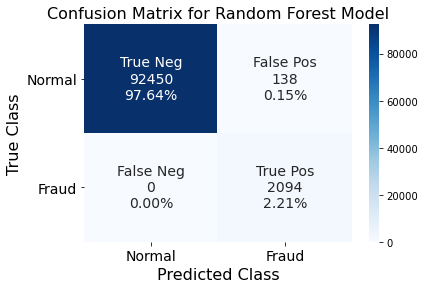

In [116]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Random Forest Model',fontsize=16)
#plt.show()
plt.savefig('RF1_1.png')

Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

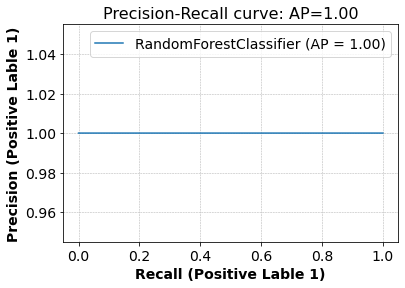

In [117]:
#clf.fit(train_data, train_label.values.ravel())
#y_true = y_test
#y_pred = clf.predict(X_test)

classifier = RandomForestClassifier(n_estimators=100, max_depth=2)
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

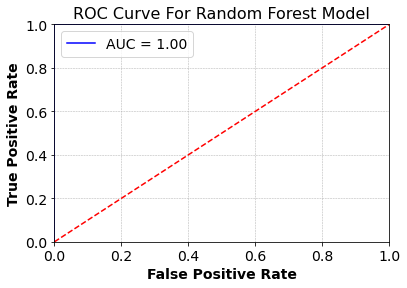

In [120]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = RandomForestClassifier(n_estimators=10, max_depth=2)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
pipeline.fit(train_data, train_label.values.ravel())
#pipeline.fit(X_train, y_train.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Random Forest Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('RF1_2.png')

In [121]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

0.9982949971603388

## Random Forest without undersampling

In [125]:
# Create model, fit, and score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

clf = RandomForestClassifier(n_estimators=50, max_depth=2)
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(X_train, y_train.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='macro'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Confusion matrix : 
 [[92588     0]
 [ 1803   291]]
Accuracy :  0.9809573097315224
F1 Score :  0.6171911815610679
Accuracy: 98.1 / Precision: 100.0 / Recall: 13.9 / Latency: 16415.12ms


In [126]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     92588
           1       1.00      0.14      0.24      2094

    accuracy                           0.98     94682
   macro avg       0.99      0.57      0.62     94682
weighted avg       0.98      0.98      0.97     94682



In [127]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.3692072442266715

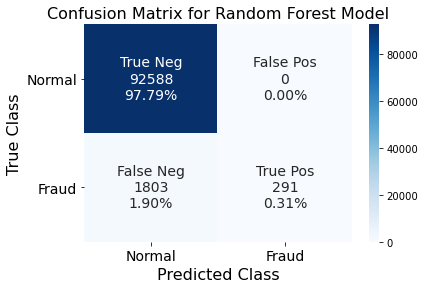

In [128]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Random Forest Model',fontsize=16)
#plt.show()
plt.savefig('RF2_1.png')

Average precision-recall score: 0.07


Text(0, 0.5, 'Precision (Positive Lable 1)')

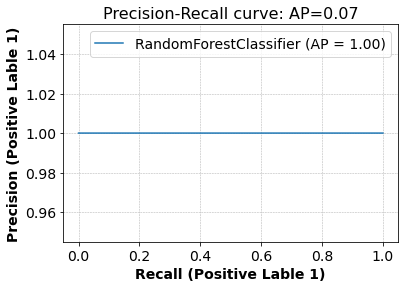

In [129]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=2)
classifier.fit(X_train, y_train.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

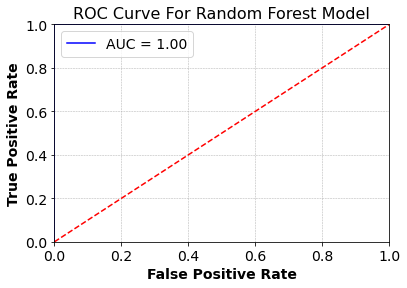

In [131]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = RandomForestClassifier(n_estimators=10, max_depth=2)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(X_train, y_train.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Random Forest Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('RF2_2.png')

## Logistic Regression with Undersampling

In [134]:
from sklearn.linear_model import LogisticRegression
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()


model_logistic = LogisticRegression(solver='lbfgs', max_iter=50, random_state=42)
model_logistic.fit(train_data, train_label.values.ravel())
predict = model_logistic.predict(X_test)
y_pred = np.round(predict)

y_true = y_test

#print(classification_report(y_test, y_pred))

#print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', model_logistic.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))


accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 514.63ms


In [135]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_test, y_pred))

[[92588     0]
 [    0  2094]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



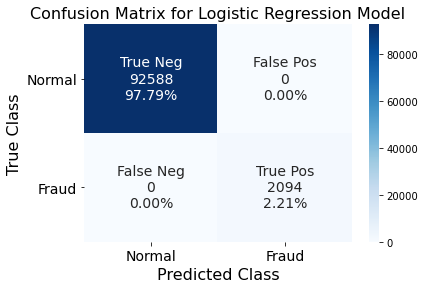

In [136]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
#sns.heatmap(cf_matrix, annot=True)
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#            fmt='.2%', cmap='Blues')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Logistic Regression Model',fontsize=16)
#plt.show()
plt.savefig('LR1_1.png')

Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

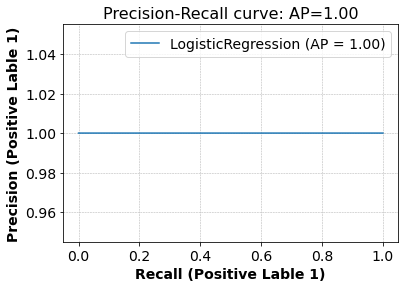

In [137]:
classifier = LogisticRegression(solver='lbfgs', max_iter=50,random_state=1)
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

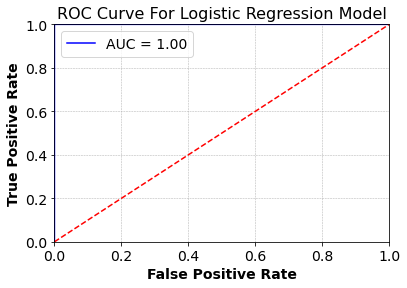

In [138]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = LogisticRegression(solver='lbfgs', max_iter=50,random_state=1)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(train_data, train_label.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Logistic Regression Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('LR1_2.png')

In [139]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

1.0

## Logistic Regression without Undersampling

In [141]:
from sklearn.linear_model import LogisticRegression
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()


model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model_logistic.fit(X_train, y_train.values.ravel())
predict = model_logistic.predict(X_test)
y_pred = np.round(predict)

y_true = y_test

#print(classification_report(y_test, y_pred))

#print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', model_logistic.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))


accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 4550.52ms


In [142]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_test, y_pred))

[[92588     0]
 [    0  2094]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



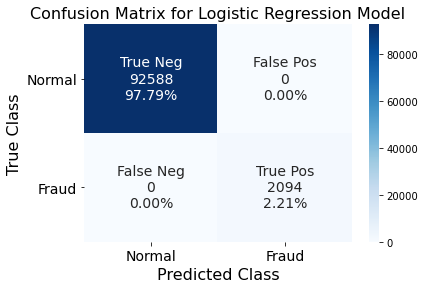

In [143]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
#sns.heatmap(cf_matrix, annot=True)
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#            fmt='.2%', cmap='Blues')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Logistic Regression Model',fontsize=16)
#plt.show()
plt.savefig('LR2_1.png')

Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

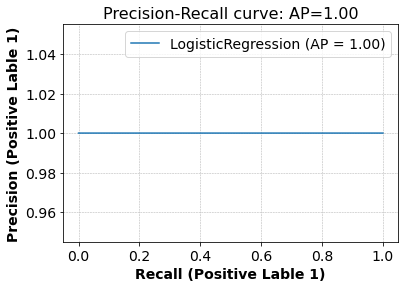

In [145]:
classifier = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=1)
classifier.fit(X_train, y_train.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

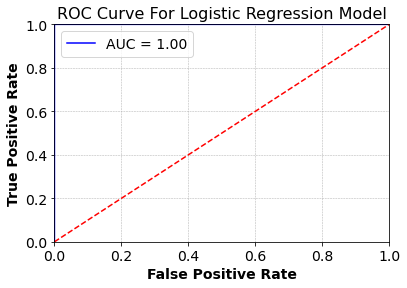

In [146]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=1)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(X_train, y_train.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Logistic Regression Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('LR2_2.png')

In [147]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

1.0

### Support Vector Machine

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

clf = SVC()
clf.fit(train_data, train_label.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Confusion matrix : 
 [[92588     0]
 [    0  2094]]
Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 3173.49ms


In [77]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



In [78]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

1.0

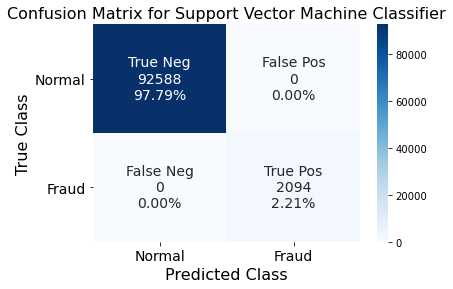

In [79]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Support Vector Machine Classifier',fontsize=16)
#plt.show()
plt.savefig('SVC1_1.png')

Average precision-recall score: 0.04


Text(0, 0.5, 'Precision (Positive Lable 1)')

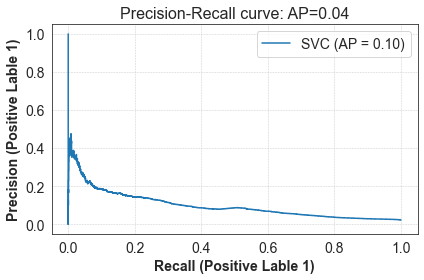

In [189]:
classifier = SVC(random_state=42)
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

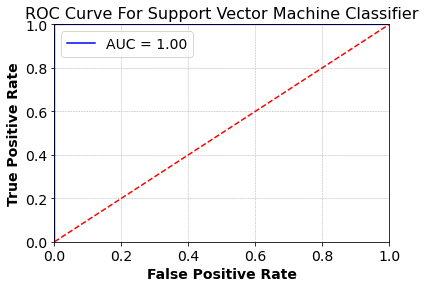

In [80]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = SVC(random_state=42,probability=True)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
pipeline.fit(train_data, train_label.values.ravel())

#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Support Vector Machine Classifier', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('SVC1_2.png')

### Neural Network Multi-Layer Perceptron Classifier

In [82]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

SimpleImputer(missing_values=np.nan, strategy='mean')

clf = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(train_data, train_label.values.ravel())
y_true = y_test
predict = clf.predict(X_test)
y_pred = np.round(predict)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Iteration 1, loss = 0.09526085
Iteration 2, loss = 0.00195658
Iteration 3, loss = 0.00113844
Iteration 4, loss = 0.00081023
Iteration 5, loss = 0.00063333
Iteration 6, loss = 0.00052297
Iteration 7, loss = 0.00044778
Iteration 8, loss = 0.00039340
Iteration 9, loss = 0.00035227
Iteration 10, loss = 0.00032015
Iteration 11, loss = 0.00029442
Iteration 12, loss = 0.00027335
Iteration 13, loss = 0.00025580
Iteration 14, loss = 0.00024097
Iteration 15, loss = 0.00022830
Iteration 16, loss = 0.00021734
Iteration 17, loss = 0.00020778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Confusion matrix : 
 [[92588     0]
 [    0  2094]]
Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 1643.58ms


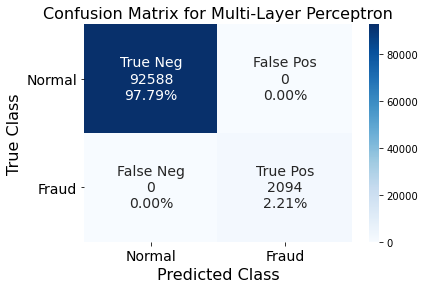

In [83]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Multi-Layer Perceptron',fontsize=16)
#plt.show()
plt.savefig('MPC1_1.png')

Iteration 1, loss = 0.09526085
Iteration 2, loss = 0.00195658
Iteration 3, loss = 0.00113844
Iteration 4, loss = 0.00081023
Iteration 5, loss = 0.00063333
Iteration 6, loss = 0.00052297
Iteration 7, loss = 0.00044778
Iteration 8, loss = 0.00039340
Iteration 9, loss = 0.00035227
Iteration 10, loss = 0.00032015
Iteration 11, loss = 0.00029442
Iteration 12, loss = 0.00027335
Iteration 13, loss = 0.00025580
Iteration 14, loss = 0.00024097
Iteration 15, loss = 0.00022830
Iteration 16, loss = 0.00021734
Iteration 17, loss = 0.00020778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

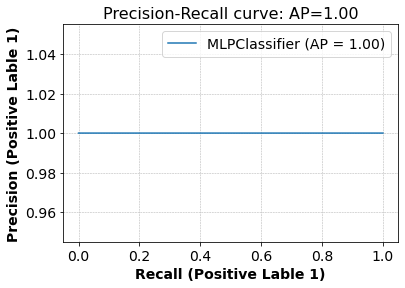

In [84]:
classifier = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

Iteration 1, loss = 0.05416646
Iteration 2, loss = 0.00142178
Iteration 3, loss = 0.00089454
Iteration 4, loss = 0.00065734
Iteration 5, loss = 0.00052210
Iteration 6, loss = 0.00043480
Iteration 7, loss = 0.00037389
Iteration 8, loss = 0.00032905
Iteration 9, loss = 0.00029471
Iteration 10, loss = 0.00026760
Iteration 11, loss = 0.00024570
Iteration 12, loss = 0.00022764
Iteration 13, loss = 0.00021252
Iteration 14, loss = 0.00019968
Iteration 15, loss = 0.00018866
Iteration 16, loss = 0.00017910
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


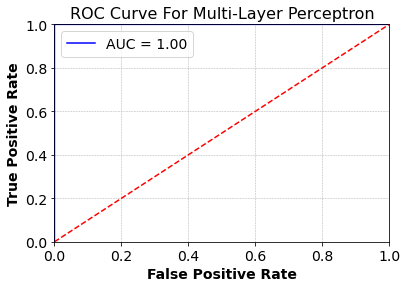

In [85]:
#random_state = np.random.RandomState(0)
#classifier = svm.LinearSVC(random_state=random_state)
#classifier.fit(X_train, y_train)
#y_score = classifier.decision_function(X_test)


import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(train_data, train_label.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Multi-Layer Perceptron', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('MPC1_2.png')

In [86]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

1.0

### Naive Bayes

In [87]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

#Create a Gaussian Classifier
clf = GaussianNB()
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(train_data, train_label.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Confusion matrix : 
 [[92588     0]
 [    0  2094]]
Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 448.84ms


In [88]:
# View the classification report for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



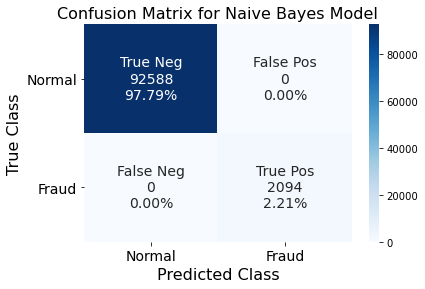

In [89]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Model',fontsize=16)
#plt.show()
plt.savefig('NB1_1.png')

Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

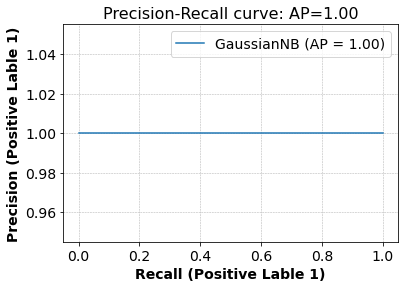

In [90]:
classifier = GaussianNB()
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

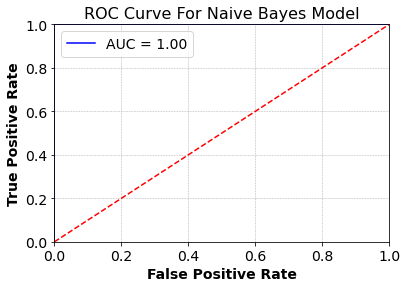

In [91]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = GaussianNB()
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(X_train, y_train.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Naive Bayes Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('NB1_2.png')

In [92]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

1.0

## K-Nearest Neighbor

In [93]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()

#Create a KNN Classifier

clf = KNeighborsClassifier(n_neighbors=3)
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(train_data, train_label.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))


Confusion matrix : 
 [[90864  1724]
 [    0  2094]]
Accuracy :  0.981791681629032
F1 Score :  0.9843609912524415
Accuracy: 98.18 / Precision: 54.85 / Recall: 100.0 / Latency: 98481.24ms


In [94]:
print(confusion_matrix(y_true, y_pred))

[[90864  1724]
 [    0  2094]]


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     92588
           1       0.55      1.00      0.71      2094

    accuracy                           0.98     94682
   macro avg       0.77      0.99      0.85     94682
weighted avg       0.99      0.98      0.98     94682



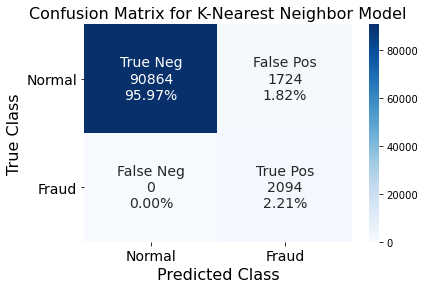

In [96]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for K-Nearest Neighbor Model',fontsize=16)
#plt.show()
plt.savefig('KNN1_1.png')

Average precision-recall score: 0.55


Text(0, 0.5, 'Precision (Positive Lable 1)')

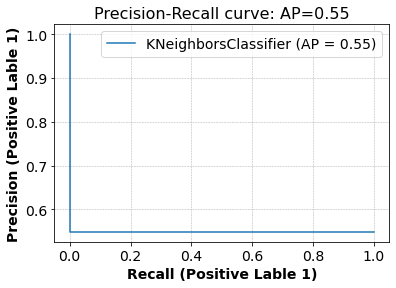

In [97]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

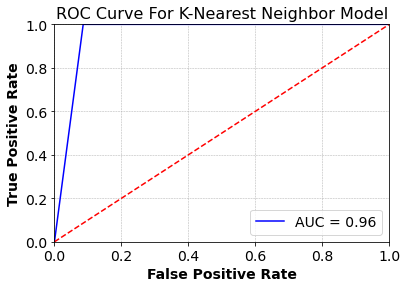

In [98]:
model = KNeighborsClassifier(n_neighbors=3)
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
#pipeline.fit(train_data, train_label.values.ravel())
pipeline.fit(train_data, train_label.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For K-Nearest Neighbor Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('KNN1_2.png')

In [99]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

0.7336500489034034

## Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
start = time()
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0)
#clf.fit(train_data, train_label) .values.ravel()

clf.fit(train_data, train_label.values.ravel())
y_true = y_test
y_pred = clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(y_true, y_pred))
print('Accuracy : ', clf.score(X_test, y_test))
print("F1 Score : ", f1_score(y_true, y_pred, average='weighted'))

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred)*100, 2)
recall = round(recall_score(y_true, y_pred)*100, 2)
end = time()
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, precision, recall,round((end - start)*1000, 2)))

Confusion matrix : 
 [[92588     0]
 [    0  2094]]
Accuracy :  1.0
F1 Score :  1.0
Accuracy: 100.0 / Precision: 100.0 / Recall: 100.0 / Latency: 410.9ms


In [103]:
from sklearn import metrics 
print(confusion_matrix(y_true, y_pred))

[[92588     0]
 [    0  2094]]


In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92588
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94682
   macro avg       1.00      1.00      1.00     94682
weighted avg       1.00      1.00      1.00     94682



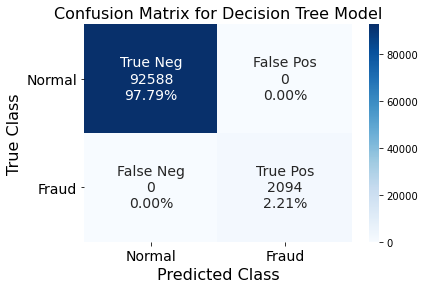

In [105]:
import seaborn as sns
cf_matrix=confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 14})

class_names = ['Normal', 'Fraud']
tick_marks = np.arange(len(class_names))+ 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0,fontsize=14)
plt.yticks(tick_marks2, class_names, rotation=0,fontsize=14)
plt.xlabel('Predicted Class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.title('Confusion Matrix for Decision Tree Model',fontsize=16)
#plt.show()
plt.savefig('DT1_1.png')

Average precision-recall score: 1.00


Text(0, 0.5, 'Precision (Positive Lable 1)')

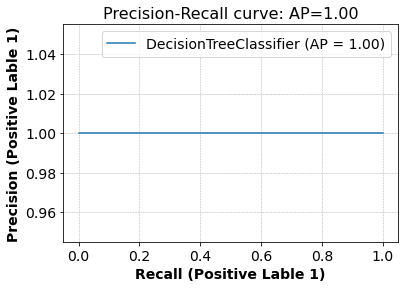

In [106]:
classifier = DecisionTreeClassifier()
classifier.fit(train_data, train_label.values.ravel())
#classifier.score(X_test, y_test)
#y_score = classifier.decision_function(X_test)
y_score = classifier.predict(X_test)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(classifier, X_test, y_test)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision),fontsize=16)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Recall (Positive Lable 1)', fontsize=14,fontweight='bold')
plt.ylabel('Precision (Positive Lable 1)',fontsize=14,fontweight='bold')

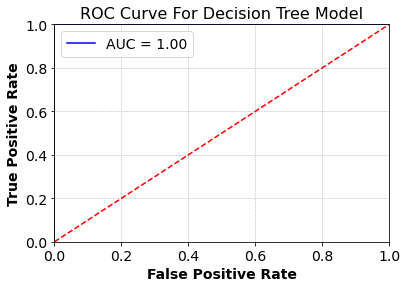

In [107]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# calculate the fpr and tpr for all thresholds of the classification
model = DecisionTreeClassifier()
#classifier.fit(train_data, train_label.values.ravel())
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])
# fit the model
pipeline.fit(train_data, train_label.values.ravel())
#pipeline.fit(X_train, y_train.values.ravel())
#y_score = pipeline.predict(X_test)

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve For Decision Tree Model', fontsize=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('False Positive Rate', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
#plt.show()
plt.savefig('DT1_2.png')

In [108]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_score)

1.0

# Algorithm Comparison

LR: 1.000000 (0.000000)
LDA: 0.977590 (0.000483)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)


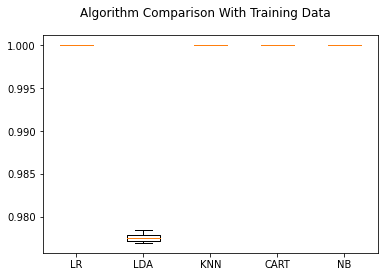

In [123]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#array = dataframe.values
X = X_train
Y = y_train.values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison With Training Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Feature Importance For Logistic Regrassion

In [109]:
Features=X_train.columns.tolist()

In [110]:
Features

['amount',
 'hour1',
 'state1',
 'zip1',
 'field1',
 'domain1',
 'field2',
 'hour2',
 'flag1',
 'total',
 'field3',
 'field4',
 'field5',
 'indicator1',
 'indicator2',
 'flag2',
 'flag3',
 'flag4',
 'flag5',
 'label']

Feature: amount, Score: 0.00133
Feature: hour1, Score: 0.07823
Feature: state1, Score: 0.03011
Feature: zip1, Score: 0.00651
Feature: field1, Score: 0.18732
Feature: domain1, Score: 0.07077
Feature: field2, Score: 0.00011
Feature: hour2, Score: 0.06838
Feature: flag1, Score: 0.01269
Feature: total, Score: 0.00054
Feature: field3, Score: 0.02491
Feature: field4, Score: 0.00610
Feature: field5, Score: 0.01713
Feature: indicator1, Score: 0.04144
Feature: indicator2, Score: 0.00139
Feature: flag2, Score: 0.00188
Feature: flag3, Score: 0.00000
Feature: flag4, Score: 0.00175
Feature: flag5, Score: 0.00482
Feature: label, Score: 0.44457


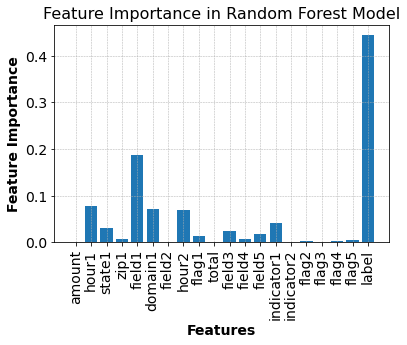

In [112]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier(n_estimators=100, max_depth=2)#LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# fit the model
model.fit(train_data, train_label.values.ravel())
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (Features[i],v))
# plot feature importance
pyplot.bar([x for x in Features], importance)


pyplot.title('Feature Importance in Random Forest Model', fontsize=16)
Features
pyplot.xticks(fontsize=14,rotation=90)
pyplot.yticks(fontsize=14)


pyplot.grid(linestyle='--', linewidth=0.5)
pyplot.xlabel('Features', fontsize=14,fontweight='bold')
pyplot.ylabel('Feature Importance',fontsize=14,fontweight='bold')
pyplot.show()


In [125]:
importance

array([-1.04568395e-01, -9.76158709e-01, -6.33668618e-02,  1.03646618e-01,
        2.72779563e-01, -9.10375827e-03, -3.69426389e-02, -9.40980599e-01,
       -2.86919685e-01, -1.04786732e-01, -5.98335041e-01, -6.41183353e-01,
        1.47258439e-01,  1.07511427e-01,  5.89694065e-02, -1.93210778e-01,
        6.41318909e-01,  2.14397736e-01,  1.19212743e-01,  1.72175674e+01])

#### ROC Curve Together

Iteration 1, loss = 0.09526085
Iteration 2, loss = 0.00195658
Iteration 3, loss = 0.00113844
Iteration 4, loss = 0.00081023
Iteration 5, loss = 0.00063333
Iteration 6, loss = 0.00052297
Iteration 7, loss = 0.00044778
Iteration 8, loss = 0.00039340
Iteration 9, loss = 0.00035227
Iteration 10, loss = 0.00032015
Iteration 11, loss = 0.00029442
Iteration 12, loss = 0.00027335
Iteration 13, loss = 0.00025580
Iteration 14, loss = 0.00024097
Iteration 15, loss = 0.00022830
Iteration 16, loss = 0.00021734
Iteration 17, loss = 0.00020778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


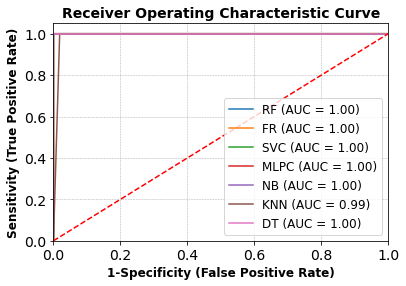

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot 
models = [
{
    'label': 'RF',
    'model': RandomForestClassifier(n_estimators=100, max_depth=2),
},
{
    'label': 'FR',
    'model': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
},   
{
    'label': 'SVC',
    'model': SVC(random_state=42,probability=True),
},
{
    'label': 'MLPC',
    'model': MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True),
},
{
    'label': 'NB',
    'model': GaussianNB(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=3),
},
{
    'label': 'DT',
    'model': DecisionTreeClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(train_data, train_label.values.ravel()) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)', fontsize=12,fontweight='bold' )
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=12,fontweight='bold')
plt.title('Receiver Operating Characteristic Curve', fontsize=14,fontweight='bold')
plt.legend(loc="lower right",fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(linestyle='--', linewidth=0.5)
#plt.show()   
plt.savefig('ROC_Curve_Combined')

### Bar Chart 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



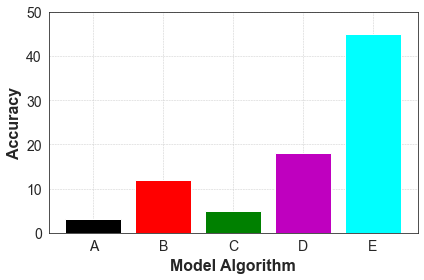

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import rcParams
import seaborn as sns
sns.set_style("white") 
# create a dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green', 'm', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)


ax = plt.axes()
#ax.set_xlim((10, 80))
ax.set_ylim((0, 50))

#plt.legend(fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set_yticklabels([])
#ax.set_xlim((0.65, 1.0))
plt.xlabel('Model Algorithm', fontsize=16,fontweight='bold')
plt.ylabel('Accuracy', fontsize=16,fontweight='bold')
rcParams.update({'figure.autolayout': True})

plt.grid(linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()
